<a href="https://colab.research.google.com/github/pawel0508/NeuralNetworks/blob/main/Tensorboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

np.set_printoptions(precision = 12, suppress = True, linewidth = 120)
print(tf.__version__)

2.3.0


### Załadowanie i przygotowanie danych

In [3]:
(x_train, y_train), (x_test, y_test) = load_data()

print(f'x train shape: {x_train.shape}')
print(f'y train shape: {y_train.shape}')
print(f'x train shape: {x_test.shape}')
print(f'y train shape: {y_test.shape}')

11493376/11490434 [==============================] - 0s 0us/step
x train shape: (60000, 28, 28)
y train shape: (60000,)
x train shape: (10000, 28, 28)
y train shape: (10000,)


In [4]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

In [6]:

print(f'x train[0] shape: {x_train[0].shape}')

x train[0] shape: (28, 28)


In [7]:
x_train = x_train/255.
x_test = x_test/255.

(-0.5, 27.5, 27.5, -0.5)

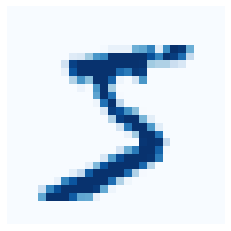

In [12]:
plt.imshow(x_train[0], cmap= 'Blues')
plt.axis('off')


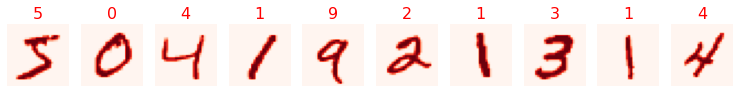

In [16]:
plt.figure(figsize = (13, 13))
for i in range(1,11):
  plt.subplot(1,10,i)
  plt.axis('off')
  plt.imshow(x_train[i-1], cmap = 'Reds')
  plt.title(y_train[i-1], color = 'red', fontsize = 16)
plt.show()

In [20]:
def build_model():
  model = Sequential()
  model.add(Flatten(input_shape = (28, 28)))
  model.add(Dense(units = 128, activation = 'relu'))
  model.add(Dropout(0.2))
  model.add(Dense(units = 10, activation = 'softmax'))
  model.compile(optimizer = 'adam',
                loss = 'sparse_categorical_crossentropy',
                metrics = ['accuracy'])
  return model

model = build_model()
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### Trenowanie modelu - **Tensorboard**

In [21]:
from tensorflow.keras.callbacks import TensorBoard
from datetime import datetime as dt

!rm -rf ./logs

log_dir = 'logs/fit/' + dt.now().strftime('%Y%m%d-%H%M%S')
tensorboard = TensorBoard(log_dir = log_dir)

In [23]:
model = build_model()
model.fit(x_train, y_train, batch_size = 32, epochs = 8, validation_split = 0.2, callbacks = [tensorboard])

Epoch 1/8
   1/1500 [..............................] - ETA: 0s - loss: 2.3882 - accuracy: 0.1250WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3308 - accuracy: 0.9045 - val_loss: 0.1570 - val_accuracy: 0.9552
Epoch 2/8
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1590 - accuracy: 0.9530 - val_loss: 0.1134 - val_accuracy: 0.9682
Epoch 3/8
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1157 - accuracy: 0.9651 - val_loss: 0.1031 - val_accuracy: 0.9707
Epoch 4/8
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0935 - accuracy: 0.9722 - val_loss: 0.0952 - val_accuracy: 0.9723
Epoch 5/8
1500/1500 [==============================] - 3s 2ms/st

In [24]:

# %load_ext tensorboard
# %tensorboard --logdir logs/fit

### **Tensorboard - Dev**

In [25]:
%load_ext tensorboard
!tensorboard dev upload --logdir logs

2020-10-25 19:39:48.123019: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

logs

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=373649185512-8v619h5kft38l4456nm2dj4ubeqsrvh6.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scop